# Import Dependencies


In [1]:
import pandas as pd
import numpy as np
import os
from os.path import join as pjoin

# from utils import is_number

import matplotlib.pyplot as plt
import seaborn as sns
import warnings

import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from imblearn.over_sampling import SMOTE
#Impute Libraries
from sklearn.impute import KNNImputer

from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer as MICE


from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import xgboost as xgb
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import classification_report,confusion_matrix
#Import SVM
from sklearn.svm import SVC
#Import library for logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier


from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict

import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,accuracy_score
from sklearn.metrics import f1_score
import numpy as np
from math import *
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,accuracy_score
from sklearn.metrics import f1_score
from sklearn import preprocessing
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier #RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier

import xgboost as xgb
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import VotingClassifier
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score,accuracy_score
from sklearn.metrics import f1_score
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split, LeaveOneOut
from math import *


import sys
import sklearn.neighbors._base
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
import matplotlib as mpl
from scipy import interp


import math
import numpy as np
from xgboost import XGBClassifier
import catboost as cb
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression, Lasso, RidgeClassifier
from sklearn.preprocessing import StandardScaler

In [2]:
raw_data_frame = pd.read_csv('processed_data.csv')

In [3]:
print(raw_data_frame['Sex'].value_counts())
raw_data_frame['Sex'].replace(' ', np.NaN, inplace = True)
raw_data_frame['Sex'].value_counts()
raw_data_frame['Sex'] = raw_data_frame['Sex'].replace({'M': 1, 'F':0})

Sex
M    332
F    147
       1
Name: count, dtype: int64


# Missing data imputation

In [4]:
def missing_imputaion(x,imputer='none'):
    xt=x
    if imputer=='knn':

        X = xt
        imputer = KNNImputer(n_neighbors=2, weights="uniform")
        Knn_data=imputer.fit_transform(X)
        X1=pd.DataFrame(Knn_data)
        y1=list(xt.columns.values)
        X1.columns=y1
        return X1
    elif imputer=='mice':
        Mice_data=MICE().fit_transform(xt)
        X1=pd.DataFrame(Mice_data)
        y1=list(xt.columns.values)
        X1.columns=y1
        return X1
    elif imputer=='randomforest':
        imputer = MissForest()
        Rf = imputer.fit_transform(xt)
        X1=pd.DataFrame(Rf)
        y1=list(xt.columns.values)
        X1.columns=y1
        return X1
    else:
        X1=xt.dropna(axis=0)
        return(X1)

In [5]:
labels = raw_data_frame['Dengue_NS1']
data_raw = raw_data_frame.drop(['Dengue_NS1'], axis=1)

data_raw = missing_imputaion(x=data_raw, imputer='mice')

import re
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
data_raw.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in data_raw.columns.values]

C:\Users\Oscar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\impute\_iterative.py:800: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [13]:
raw_data_frame.isnull().sum()

Sex                  21
Age                  21
Hemoglobin(g/dl)     45
WBC(/L)              41
RBC(/L)              51
Platelets(/L)        29
Neutrophil(%)        51
Lymphocyte(%)        49
Monocyte(%)          51
Eosinophil(%)        51
Basophil(%)          62
HCT/PCV(%)           40
MCV(fL)              54
MCH(pg)              54
MCHC(g/dL)           54
RDW-CV(%)            72
MPV(fL)             127
Dengue_NS1            0
dtype: int64

# Data Scaling

In [6]:
columns = list(data_raw.columns)
for column in columns:
      data_raw[column] = (data_raw[column] - data_raw[column].mean()) / (data_raw[column].std())

#Feature selection

In [7]:
def feature_selection_without_gen(x,y):
        X_train=x
        y_train=y
        mdl=[]
        mdl.append(xgb.XGBClassifier(
                        max_depth=4
                        ,learning_rate=0.2
                        ,reg_lambda=1
                        ,n_estimators=150
                        ,subsample = 0.9
                        ,colsample_bytree = 0.9))
        mdl.append(RandomForestClassifier(n_estimators=50,max_depth=10,
                                            random_state=0,class_weight=None,
                                            n_jobs=-1))
        mdl.append(ExtraTreesClassifier())
        ml1=['XGBoost','Random_Forest','Extra_Tree']
        feat_sel=[]
        for i in range(3):

            model=mdl[i]
            model.fit(X_train, y_train)
            model.feature_importances_
            importances = model.feature_importances_
            indices = np.argsort(importances)[::-1]
            feat_labels = X_train.columns
            print("Feature ranking:")
            sel_feat=[]
            for f in range(X_train.shape[1]):
                    print("%d. feature no:%d feature name:%s (%f)" % (f+1, indices[f], feat_labels[indices[f]], importances[indices[f]]))
                    sel_feat.append(feat_labels[indices[f]])
            top_n=20
            feat_sel.append(sel_feat)
            indices = indices[0:top_n]
            plt.subplots(figsize=(12, 10))
            g = sns.barplot(x= importances[indices], y = feat_labels[indices], orient='h',label='big') #import_feature.iloc[:Num_f]['col'].values[indices]

            g.set_title(ml1[i]+' feature selection',fontsize=25)
            g.set_xlabel("Relative importance",fontsize=25)
            g.set_ylabel("Features",fontsize=25)
            g.tick_params(labelsize=14)
            sns.despine()
                # plt.savefig('feature_importances_v3.png')
            plt.show()
            print('-----------------------------------------------------------------')
        xgboost=feat_sel[0]
        randomforest=feat_sel[1]
        extratree=feat_sel[2]

        return(xgboost,randomforest,extratree)

Feature ranking:
1. feature no:10 feature name:Basophil(%) (0.480551)
2. feature no:5 feature name:Platelets(/L) (0.065565)
3. feature no:13 feature name:MCH(pg) (0.062876)
4. feature no:6 feature name:Neutrophil(%) (0.061564)
5. feature no:11 feature name:HCT/PCV(%) (0.057308)
6. feature no:7 feature name:Lymphocyte(%) (0.048775)
7. feature no:12 feature name:MCV(fL) (0.047932)
8. feature no:2 feature name:Hemoglobin(g/dl) (0.030289)
9. feature no:16 feature name:MPV(fL) (0.029221)
10. feature no:15 feature name:RDW-CV(%) (0.019972)
11. feature no:4 feature name:RBC(/L) (0.019004)
12. feature no:1 feature name:Age (0.018977)
13. feature no:9 feature name:Eosinophil(%) (0.016639)
14. feature no:0 feature name:Sex (0.014799)
15. feature no:3 feature name:WBC(/L) (0.012055)
16. feature no:8 feature name:Monocyte(%) (0.008726)
17. feature no:14 feature name:MCHC(g/dL) (0.005747)


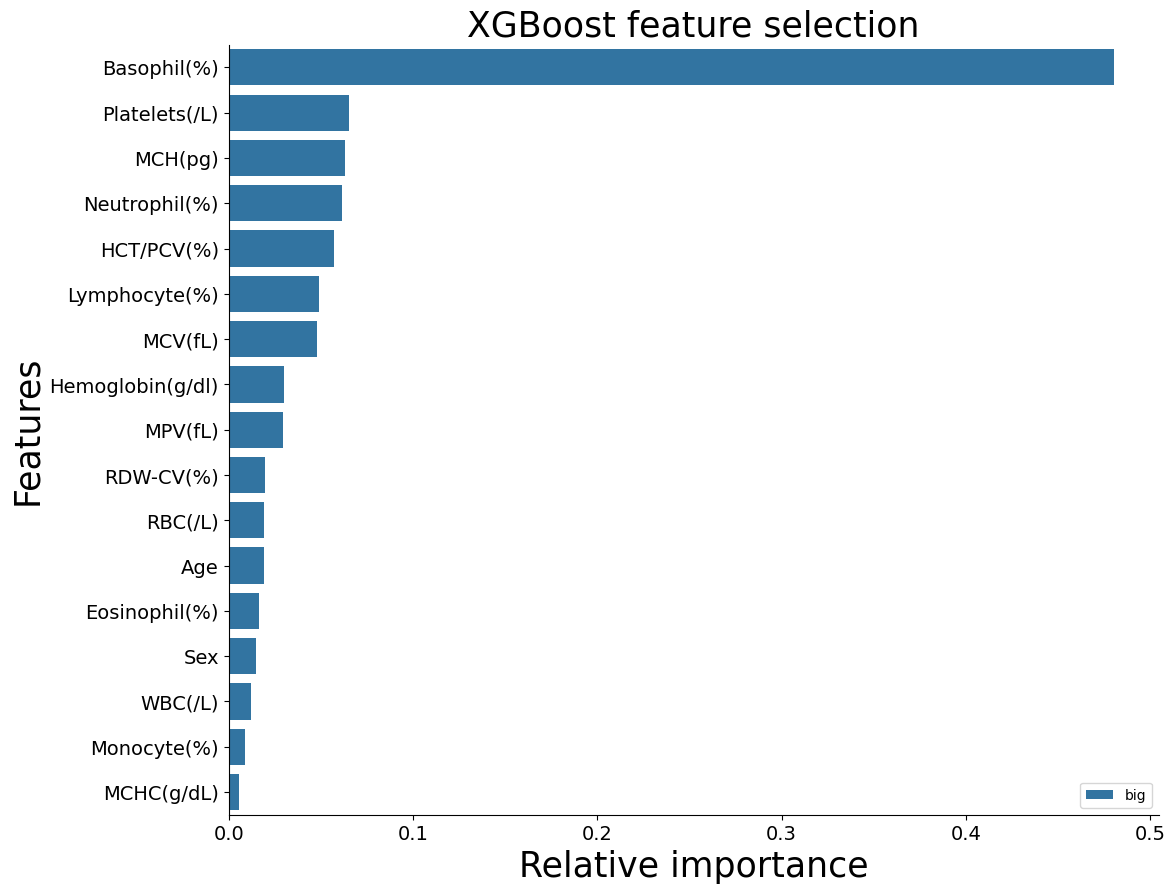

-----------------------------------------------------------------
Feature ranking:
1. feature no:10 feature name:Basophil(%) (0.286882)
2. feature no:5 feature name:Platelets(/L) (0.261243)
3. feature no:11 feature name:HCT/PCV(%) (0.110987)
4. feature no:12 feature name:MCV(fL) (0.058030)
5. feature no:2 feature name:Hemoglobin(g/dl) (0.054908)
6. feature no:13 feature name:MCH(pg) (0.041795)
7. feature no:14 feature name:MCHC(g/dL) (0.027398)
8. feature no:4 feature name:RBC(/L) (0.025194)
9. feature no:6 feature name:Neutrophil(%) (0.021533)
10. feature no:8 feature name:Monocyte(%) (0.020498)
11. feature no:7 feature name:Lymphocyte(%) (0.015478)
12. feature no:9 feature name:Eosinophil(%) (0.014823)
13. feature no:16 feature name:MPV(fL) (0.013663)
14. feature no:1 feature name:Age (0.013608)
15. feature no:0 feature name:Sex (0.012426)
16. feature no:3 feature name:WBC(/L) (0.011348)
17. feature no:15 feature name:RDW-CV(%) (0.010187)


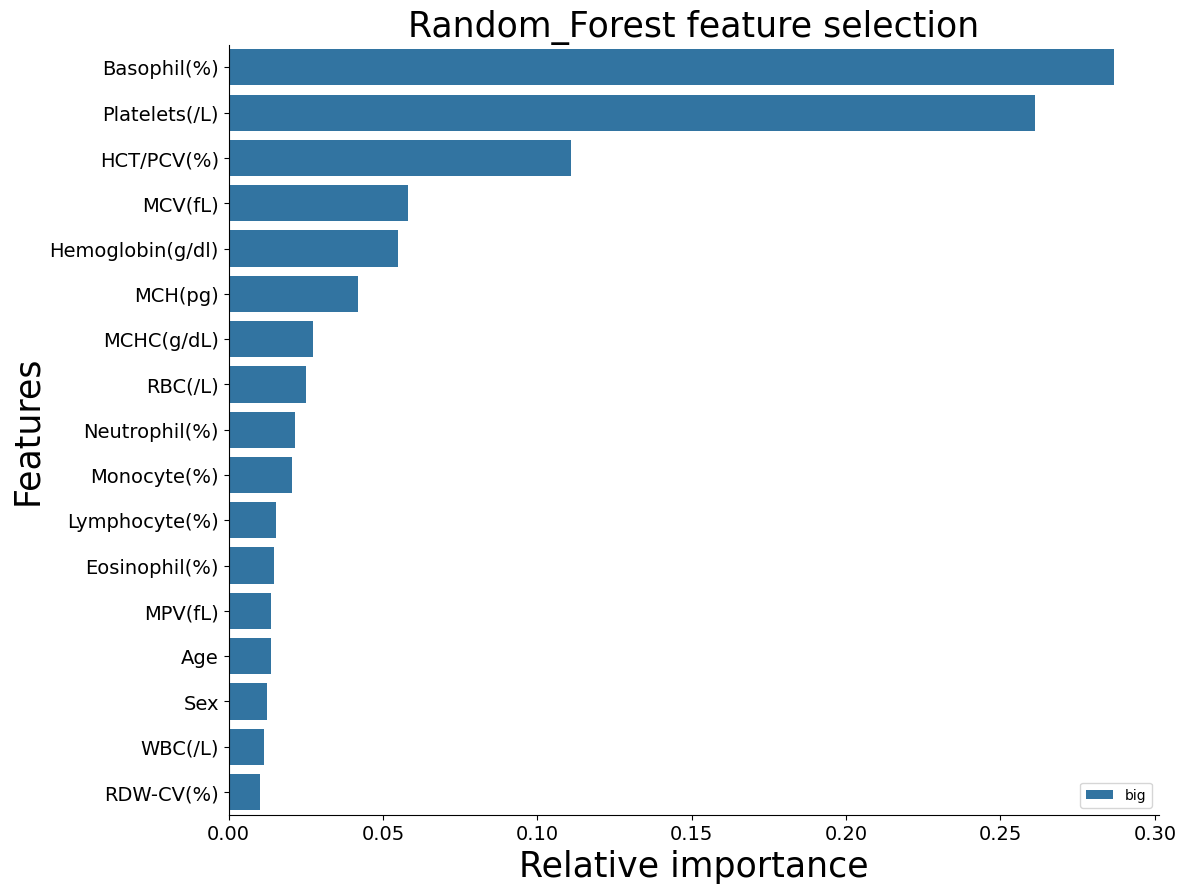

-----------------------------------------------------------------
Feature ranking:
1. feature no:5 feature name:Platelets(/L) (0.252832)
2. feature no:10 feature name:Basophil(%) (0.189090)
3. feature no:2 feature name:Hemoglobin(g/dl) (0.075277)
4. feature no:11 feature name:HCT/PCV(%) (0.070817)
5. feature no:12 feature name:MCV(fL) (0.055057)
6. feature no:13 feature name:MCH(pg) (0.045717)
7. feature no:6 feature name:Neutrophil(%) (0.034967)
8. feature no:14 feature name:MCHC(g/dL) (0.034715)
9. feature no:7 feature name:Lymphocyte(%) (0.033907)
10. feature no:0 feature name:Sex (0.033715)
11. feature no:4 feature name:RBC(/L) (0.031582)
12. feature no:8 feature name:Monocyte(%) (0.028910)
13. feature no:1 feature name:Age (0.026955)
14. feature no:3 feature name:WBC(/L) (0.024787)
15. feature no:16 feature name:MPV(fL) (0.022336)
16. feature no:15 feature name:RDW-CV(%) (0.020753)
17. feature no:9 feature name:Eosinophil(%) (0.018581)


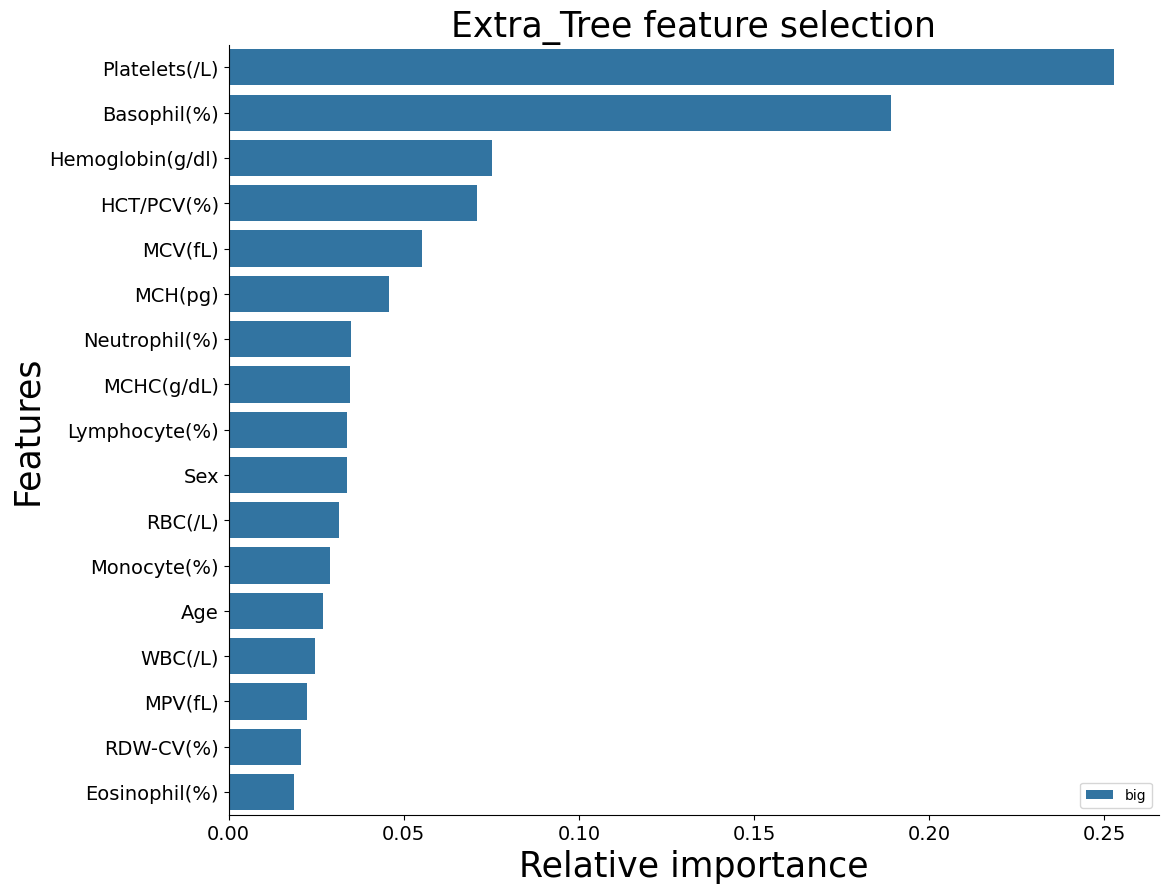

-----------------------------------------------------------------


In [8]:
xgboost,randomforest,extratree = feature_selection_without_gen(data_raw, labels)

# Create folds

In [9]:
def cv_fold(X1,yt,n_splits=5,shuffle=False):
    import numpy as np
    from sklearn.model_selection import StratifiedKFold
    from imblearn.over_sampling import SMOTE
    from sklearn.preprocessing import StandardScaler
    smote=SMOTE()
    cc=X1.columns
    xx1 = StandardScaler().fit_transform(X1)
    X=np.array(xx1)
    y=np.array(yt)
    skf = StratifiedKFold(n_splits=n_splits, random_state=None, shuffle=shuffle)
    skf.get_n_splits(X, y)
    xtrain=[]
    xtest=[]
    ytrain=[]
    ytest=[]
    for train_index, test_index in skf.split(X, y):
            X_train, X_test = X[train_index], X[test_index]

            y_train, y_test = y[train_index], y[test_index]
            x1,y1= smote.fit_resample(X_train, y_train)
            xtrain.append(x1)
            xtest.append(X_test)
            ytrain.append(y1)
            ytest.append(y_test)
    d={'data':(xtrain,xtest,ytrain,ytest),'index':cc}
    return d

In [10]:
fold_data = cv_fold(X1=data_raw,yt=labels)

# Train with top features
Model Index:

'MLPClassifier' 0,

'LinearDiscriminantAnalysis' 1,

'XGBClassifier' 2,

'RandomForestClassifier' 3,

'LogisticRegression' 4,

'SVM' 5,

'ExtraTreesClassifier' 6,

'AdaBoostClassifier' 7,

'KNeighborsClassifier' 8,

'GradientBoostingClassifier' 9,

'XGB_untuned' 10,

'CatBoost_untuned' 11,

'LGBM_untuned' 12,

'AdaBoost_untuned' 13,

'SVC_untuned' 14,

'RandomForest_untuned' 15,

'ExtraTrees_untuned' 16,

'KNeighbors_untuned' 17,

'LDA_untuned' 18,

'LogisticRegression_untuned' 19,

'ElasticNet_untuned' 20,

'Ridge Classifier' 21

In [11]:
def models():

        clf=[]
        MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
               beta_2=0.999, early_stopping=False, epsilon=1e-08,
               hidden_layer_sizes=(13, 13), learning_rate='constant',
               learning_rate_init=0.001, max_iter=500, momentum=0.9,
               nesterovs_momentum=True, power_t=0.5, random_state=111,
               shuffle=False, solver='adam', tol=0.0001, validation_fraction=0.1,
               verbose=False, warm_start=False)
        clf.append(MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500))


        clf.append(LinearDiscriminantAnalysis())

        clf.append(xgb.XGBClassifier(
                        max_depth=85
                        ,learning_rate=0.9388440565186442,
                        min_split_loss= 0.0
                        ,reg_lambda=5.935581318908179
                        ,min_child_weight= 2.769401581888831
                        ,colsample_bylevel= 0.7878344729848824
                        ,colsample_bynode=0.4895496034538383
                        ,alpha= 7.9692927383000445
                        ,n_estimators=150
                        ,subsample = 0.2656532818978606
                        ,colsample_bytree = 0.8365485367400313))

        clf.append(RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                               max_depth=10, max_features='auto', max_leaf_nodes=None,
                               min_impurity_decrease=0.0,
                               min_samples_leaf=1, min_samples_split=2,
                               min_weight_fraction_leaf=0.0, n_estimators=100,
                               n_jobs=None, oob_score=False, random_state=0,
                               verbose=0, warm_start=False))


        clf.append(LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                           intercept_scaling=1, l1_ratio=None, max_iter=100,
                           multi_class='multinomial', n_jobs=None, penalty='l2',
                           random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                           warm_start=False))


        clf.append(SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                decision_function_shape='ovr', degree=3, gamma='auto',
                kernel='linear', max_iter=100, probability=True, random_state=0,
                shrinking=True, tol=0.001, verbose=False))


        clf.append(ExtraTreesClassifier(n_estimators=100, max_depth=8, min_samples_split=10, random_state=0))

        clf.append(AdaBoostClassifier(n_estimators=100, random_state=0))

        clf.append(KNeighborsClassifier(n_neighbors=3))
        clf.append(GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=10, random_state=0))

        clf.append(XGBClassifier(n_estimators=400,
                      iterations=500,
                      learning_rate=0.001,
                      loss_function='Logloss'))
        clf.append(cb.CatBoostClassifier())
        clf.append(LGBMClassifier(learning_rate=0.01))
        clf.append(AdaBoostClassifier(learning_rate=0.001))
        clf.append(SVC(probability=True))
        clf.append(RandomForestClassifier())
        clf.append(ExtraTreesClassifier(bootstrap=True))
        clf.append(KNeighborsClassifier(n_neighbors=3))
        clf.append(LinearDiscriminantAnalysis())
        clf.append(LogisticRegression())
        clf.append(LogisticRegression(penalty='elasticnet', l1_ratio=0.01, solver='saga'))
        #clf.append(RidgeClassifier())




        clff=['MLPClassifier','LinearDiscriminantAnalysis','XGBClassifier','RandomForestClassifier','LogisticRegression','SVM','ExtraTreesClassifier','AdaBoostClassifier','KNeighborsClassifier','GradientBoostingClassifier','XGB_untuned', 'CatBoost_untuned', 'LGBM_untuned', 'AdaBoost_untuned', 'SVC_untuned', 'RandomForest_untuned', 'ExtraTrees_untuned', 'KNeighbors_untuned', 'LDA_untuned', 'LogisticRegression_untuned', 'ElasticNet_untuned']
        #, 'Ridge_untuned'
        #Result.to_csv
        return(clf,clff )


def models_v_2():

        clf=[]
        MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
               beta_2=0.999, early_stopping=False, epsilon=1e-08,
               hidden_layer_sizes=(13, 13), learning_rate='constant',
               learning_rate_init=0.001, max_iter=500, momentum=0.9,
               nesterovs_momentum=True, power_t=0.5, random_state=111,
               shuffle=False, solver='adam', tol=0.0001, validation_fraction=0.1,
               verbose=False, warm_start=False)
        clf.append(MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500))


        clf.append(LinearDiscriminantAnalysis())

        clf.append(xgb.XGBClassifier(
                        max_depth=85
                        ,learning_rate=0.9388440565186442,
                        min_split_loss= 0.0
                        ,reg_lambda=5.935581318908179
                        ,min_child_weight= 2.769401581888831
                        ,colsample_bylevel= 0.7878344729848824
                        ,colsample_bynode=0.4895496034538383
                        ,alpha= 7.9692927383000445
                        ,n_estimators=150
                        ,subsample = 0.2656532818978606
                        ,colsample_bytree = 0.8365485367400313))

        clf.append(RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                               max_depth=10, max_features='auto', max_leaf_nodes=None,
                               min_impurity_decrease=0.0,
                               min_samples_leaf=1, min_samples_split=2,
                               min_weight_fraction_leaf=0.0, n_estimators=100,
                               n_jobs=None, oob_score=False, random_state=0,
                               verbose=0, warm_start=False))


        clf.append(LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                           intercept_scaling=1, l1_ratio=None, max_iter=100,
                           multi_class='multinomial', n_jobs=None, penalty='l2',
                           random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                           warm_start=False))


        clf.append(SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                decision_function_shape='ovr', degree=3, gamma='auto',
                kernel='linear', max_iter=100, probability=True, random_state=0,
                shrinking=True, tol=0.001, verbose=False))


        clf.append(ExtraTreesClassifier(n_estimators=100, max_depth=8, min_samples_split=10, random_state=0))

        clf.append(AdaBoostClassifier(n_estimators=100, random_state=0))

        clf.append(KNeighborsClassifier(n_neighbors=3))
        clf.append(GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=10, random_state=0))

        clf.append(XGBClassifier(n_estimators=400,
                      iterations=500,
                      learning_rate=0.001,
                      loss_function='Logloss'))
        clf.append(cb.CatBoostClassifier())
        clf.append(LGBMClassifier(learning_rate=0.01))
        clf.append(AdaBoostClassifier(learning_rate=0.001))
        clf.append(SVC(probability=True))
        clf.append(RandomForestClassifier())
        clf.append(ExtraTreesClassifier(bootstrap=True))
        clf.append(KNeighborsClassifier(n_neighbors=3))
        clf.append(LinearDiscriminantAnalysis())
        clf.append(LogisticRegression())
        clf.append(LogisticRegression(penalty='elasticnet', l1_ratio=0.01, solver='saga'))
        clf.append(RidgeClassifier())




        clff=['MLPClassifier','LinearDiscriminantAnalysis','XGBClassifier','RandomForestClassifier','LogisticRegression','SVM','ExtraTreesClassifier','AdaBoostClassifier','KNeighborsClassifier','GradientBoostingClassifier','XGB_untuned', 'CatBoost_untuned', 'LGBM_untuned', 'AdaBoost_untuned', 'SVC_untuned', 'RandomForest_untuned', 'ExtraTrees_untuned', 'KNeighbors_untuned', 'LDA_untuned', 'LogisticRegression_untuned', 'ElasticNet_untuned', 'Ridge_untuned']

        #
        #Result.to_csv
        return(clf,clff)

def classification_with_top_feature_v_2(data,feature_num,feature_selection_model,classifier,feat_increment):

        xtrain,xtest,ytrain,ytest=data['data']
        ind=data['index'].to_list()
        num_feat=feature_num
        fsm=feature_selection_model
        feature=fsm[0:num_feat]
        clf,clff=models_v_2()


        if classifier=='all':
            l=0
            for c in range(22):

                clf1=clf[c]
                a=[]
                p=[]
                r=[]
                s=[]
                f=[]
                mean_tpr=[]
                mean_auc=[]

                feat=[]
                for i in list(range(0,num_feat,feat_increment)):

                    y_pred=[]
                    y2=[]
                    tl=fsm[0:i+1]  #feature increasing
                    tprs = []
                    aucs = []
                    mean_fpr = np.linspace(0,1,100)

                    total_fold_num = len(xtrain)
                    for k in range(total_fold_num):
                        x11=pd.DataFrame(xtrain[k])
                        x11.columns=ind
                        x1=x11[tl]
                        y1=ytrain[k]
                        model = clf1.fit(np.array(x1),np.array(y1))
                        #model = clf1.fit(x[train],y.iloc[train])
                        xts=pd.DataFrame(xtest[k])
                        xts.columns=ind
                        xt1=xts[tl]
                        y_pr=model.predict(xt1)


                        y_pred.extend(y_pr)
                        y2.extend(ytest[k])



                    y21=y2
                    y_pred1=y_pred
                    categories=list(pd.Series(y2).unique())



                    from sklearn.metrics import multilabel_confusion_matrix, confusion_matrix
                    # main confusion matrix
                    cm = confusion_matrix(y21, y_pred1)
                    # cm_per_class: it returns a 2x2 confusion matrix for each class, where 'i' represnt  class index
                    # cm_per_class[i][0][0]:TN,   cm_per_class[i][0][1]:FP,   cm_per_class[i][1][0]:FN,    cm_per_class[i][1][1]:TP
                    cm_per_class = multilabel_confusion_matrix(y21, y_pred1)
                    # Overall Accuracy
                    Overall_Accuracy = np.sum(np.diagonal(cm)) / np.sum(cm)
                    Overall_Accuracy = round(Overall_Accuracy*100, 2)
                    # create confusion matrix table (pd.DataFrame)
                    # cm_table = pd.DataFrame(cm, index=categories , columns=categories)
                    if (i+1)!=1:
                      feature_no= 'top_'+str(i+1)+'_features'
                    else:
                      feature_no= 'top_'+str(i+1)+'_feature'

                    try:

                        Eval_Mat = []
                        # per class metricies
                        for i in range(len(categories)):
                            TN = cm_per_class[i][0][0]
                            FP = cm_per_class[i][0][1]
                            FN = cm_per_class[i][1][0]
                            TP = cm_per_class[i][1][1]
                            Accuracy = round(100*(TP+TN)/(TP+TN+FP+FN), 2)
                            Precision = round(100*(TP)/(TP+FP), 2)
                            Sensitivity = round(100*(TP)/(TP+FN), 2)
                            F1_score = round((2*Precision*Sensitivity)/(Precision+Sensitivity), 2)
                            Specificity = round(100*(TN)/(TN+FP), 2)
                            Eval_Mat.append([Accuracy, Precision, Sensitivity, F1_score, Specificity])
                        # sizes of each class
                        s2 = np.sum(cm,axis=1)
                        # create tmep excel table
                        headers=['Accuracy', 'Precision', 'Sensitivity', 'F1_score', 'Specificity']
                        temp_table = pd.DataFrame(Eval_Mat, index=categories ,columns=headers)
                        # weighted average of per class metricies
                        ac=Overall_Accuracy
                        # ac = round(temp_table['Accuracy'].dot(s)/np.sum(s), 2)
                        pr = round(temp_table['Precision'].dot(s2)/np.sum(s2), 2)
                        rc = round(temp_table['Sensitivity'].dot(s2)/np.sum(s2), 2)
                        f1 = round(temp_table['F1_score'].dot(s2)/np.sum(s2), 2)
                        sp = round(temp_table['Specificity'].dot(s2)/np.sum(s2), 2)


                    except:
                        ac='NaN'
                        # ac = round(temp_table['Accuracy'].dot(s)/np.sum(s), 2)
                        pr = 'NaN'
                        rc ='NaN'
                        f1 = 'NaN'
                        sp = 'NaN'




                    a.append(ac)
                    p.append(pr)
                    r.append(rc)
                    s.append(sp)
                    f.append(f1)
                    feat.append(feature_no)



                Result=pd.concat([pd.DataFrame(a),pd.DataFrame(p),pd.DataFrame(r),pd.DataFrame(s),pd.DataFrame(f)],1)
                Result.columns=['Accuracy','Precision','Recall','Specificity','F1-score']
                Result.index= feat
                #Result.to_csv
                print('---------------------------------------------------------------------')
                print('Result for '+clff[l]+' classifier')
                print('---------------------------------------------------------------------')
                print(Result)
    #             Result.to_csv('/content/'+clff[l]+'_classifier_for_top10_features.csv')

                print('---------------------------------------------------------------------')
                l=l+1

            return
        else:

                clf1=clf[classifier]  #model 0= MLP, 1= LDA, 2 = XGBoost, 3 = RF, 4= Logit, 5=SVC, 6 = Extra tree, 7= Adaboost, 8 = KNN, 9 = GradientBoost
                l=classifier
#             l=0


#                 clf1=clf[c]
                a=[]
                p=[]
                r=[]
                s=[]
                f=[]
                mean_tpr=[]
                mean_auc=[]

                feat=[]
                for i in list(range(0,num_feat,feat_increment)):

                    y_pred=[]
                    y2=[]
                    tl=fsm[0:i+1]
                    tprs = []
                    aucs = []
                    mean_fpr = np.linspace(0,1,100)

                    total_fold_num = len(xtrain)
                    for k in range(total_fold_num):
                        x11=pd.DataFrame(xtrain[k])
                        x11.columns=ind
                        x1=x11[tl]
                        y1=ytrain[k]
                        model = clf1.fit(np.array(x1),np.array(y1))
                        #model = clf1.fit(x[train],y.iloc[train])
                        xts=pd.DataFrame(xtest[k])
                        xts.columns=ind
                        xt1=xts[tl]
                        y_pr=model.predict(np.array(xt1))

                        y_pred.extend(y_pr)
                        y2.extend(ytest[k])



                    y21=y2
                    y_pred1=y_pred

                    categories=list(pd.Series(y2).unique())
                    from sklearn.metrics import multilabel_confusion_matrix, confusion_matrix
                    # main confusion matrix
                    cm = confusion_matrix(y21, y_pred1)
                    cm_per_class = multilabel_confusion_matrix(y21, y_pred1)
                    # Overall Accuracy
                    Overall_Accuracy = np.sum(np.diagonal(cm)) / np.sum(cm)
                    Overall_Accuracy = round(Overall_Accuracy*100, 2)
                    # create confusion matrix table (pd.DataFrame)
                    # cm_table = pd.DataFrame(cm, index=categories , columns=categories)
                    if (i+1)!=1:
                      feature_no= 'top_'+str(i+1)+'_features'
                    else:
                      feature_no= 'top_'+str(i+1)+'_feature'

                    try:

                        Eval_Mat = []
                        # per class metricies
                        for i in range(len(categories)):
                            TN = cm_per_class[i][0][0]
                            FP = cm_per_class[i][0][1]
                            FN = cm_per_class[i][1][0]
                            TP = cm_per_class[i][1][1]
                            Accuracy = round(100*(TP+TN)/(TP+TN+FP+FN), 2)
                            Precision = round(100*(TP)/(TP+FP), 2)
                            Sensitivity = round(100*(TP)/(TP+FN), 2)
                            F1_score = round((2*Precision*Sensitivity)/(Precision+Sensitivity), 2)
                            Specificity = round(100*(TN)/(TN+FP), 2)
                            Eval_Mat.append([Accuracy, Precision, Sensitivity, F1_score, Specificity])
                        # sizes of each class
                        s2 = np.sum(cm,axis=1)
                        # create tmep excel table
                        headers=['Accuracy', 'Precision', 'Sensitivity', 'F1_score', 'Specificity']
                        temp_table = pd.DataFrame(Eval_Mat, index=categories ,columns=headers)
                        # weighted average of per class metricies
                        ac=Overall_Accuracy
                        # ac = round(temp_table['Accuracy'].dot(s)/np.sum(s), 2)
                        pr = round(temp_table['Precision'].dot(s2)/np.sum(s2), 2)
                        rc = round(temp_table['Sensitivity'].dot(s2)/np.sum(s2), 2)
                        f1 = round(temp_table['F1_score'].dot(s2)/np.sum(s2), 2)
                        sp = round(temp_table['Specificity'].dot(s2)/np.sum(s2), 2)


                    except:
                        ac='NaN'
                        # ac = round(temp_table['Accuracy'].dot(s)/np.sum(s), 2)
                        pr = 'NaN'
                        rc ='NaN'
                        f1 = 'NaN'
                        sp = 'NaN'

                    a.append(ac)
                    p.append(pr)
                    r.append(rc)
                    s.append(sp)
                    f.append(f1)
                    feat.append(feature_no)


#                     conf_matrix =confusion_matrix(y2, y_pred)

#                     print('************** ')
#                     print("Top %d  feature" %(i+1))
#                     print('************** ')
#                     print(conf_matrix)
#


                Result=pd.concat([pd.DataFrame(a),pd.DataFrame(p),pd.DataFrame(r),pd.DataFrame(s),pd.DataFrame(f)],1)
                Result.columns=['Accuracy','Precision','Recall','Specificity','F1-score']
                Result.index= feat
                #Result.to_csv
                print('---------------------------------------------------------------------')
                print('Result for '+clff[l]+' classifier')
                print('---------------------------------------------------------------------')
                print(Result)
    #             Result.to_csv('/content/'+clff[l]+'_classifier_for_top10_features.csv')
#                 l=l+1
                print('---------------------------------------------------------------------')


                return




def classification_with_top_feature(data,feature_num,feature_selection_model,classifier,feat_increment):

        xtrain,xtest,ytrain,ytest=data['data']
        ind=data['index'].to_list()
        num_feat=feature_num
        fsm=feature_selection_model
        feature=fsm[0:num_feat]
        clf,clff=models()


        if classifier=='all':
            l=0
            for c in range(21):

                clf1=clf[c]
                a=[]
                p=[]
                r=[]
                s=[]
                f=[]
                mean_tpr=[]
                mean_auc=[]

                feat=[]
                for i in list(range(0,num_feat,feat_increment)):

                    y_pred=[]
                    y2=[]
                    tl=fsm[0:i+1]  #feature increasing
                    tprs = []
                    aucs = []
                    mean_fpr = np.linspace(0,1,100)

                    total_fold_num = len(xtrain)
                    for k in range(total_fold_num):
                        x11=pd.DataFrame(xtrain[k])
                        x11.columns=ind
                        x1=x11[tl]
                        y1=ytrain[k]
                        model = clf1.fit(np.array(x1),np.array(y1))
                        #model = clf1.fit(x[train],y.iloc[train])
                        xts=pd.DataFrame(xtest[k])
                        xts.columns=ind
                        xt1=xts[tl]
                        y_pr=model.predict(xt1)


                        y_pred.extend(y_pr)
                        y2.extend(ytest[k])



                    y21=y2
                    y_pred1=y_pred
                    categories=list(pd.Series(y2).unique())



                    from sklearn.metrics import multilabel_confusion_matrix, confusion_matrix
                    # main confusion matrix
                    cm = confusion_matrix(y21, y_pred1)
                    # cm_per_class: it returns a 2x2 confusion matrix for each class, where 'i' represnt  class index
                    # cm_per_class[i][0][0]:TN,   cm_per_class[i][0][1]:FP,   cm_per_class[i][1][0]:FN,    cm_per_class[i][1][1]:TP
                    cm_per_class = multilabel_confusion_matrix(y21, y_pred1)
                    # Overall Accuracy
                    Overall_Accuracy = np.sum(np.diagonal(cm)) / np.sum(cm)
                    Overall_Accuracy = round(Overall_Accuracy*100, 2)
                    # create confusion matrix table (pd.DataFrame)
                    # cm_table = pd.DataFrame(cm, index=categories , columns=categories)
                    if (i+1)!=1:
                      feature_no= 'top_'+str(i+1)+'_features'
                    else:
                      feature_no= 'top_'+str(i+1)+'_feature'

                    try:

                        Eval_Mat = []
                        # per class metricies
                        for i in range(len(categories)):
                            TN = cm_per_class[i][0][0]
                            FP = cm_per_class[i][0][1]
                            FN = cm_per_class[i][1][0]
                            TP = cm_per_class[i][1][1]
                            Accuracy = round(100*(TP+TN)/(TP+TN+FP+FN), 2)
                            Precision = round(100*(TP)/(TP+FP), 2)
                            Sensitivity = round(100*(TP)/(TP+FN), 2)
                            F1_score = round((2*Precision*Sensitivity)/(Precision+Sensitivity), 2)
                            Specificity = round(100*(TN)/(TN+FP), 2)
                            Eval_Mat.append([Accuracy, Precision, Sensitivity, F1_score, Specificity])
                        # sizes of each class
                        s2 = np.sum(cm,axis=1)
                        # create tmep excel table
                        headers=['Accuracy', 'Precision', 'Sensitivity', 'F1_score', 'Specificity']
                        temp_table = pd.DataFrame(Eval_Mat, index=categories ,columns=headers)
                        # weighted average of per class metricies
                        ac=Overall_Accuracy
                        # ac = round(temp_table['Accuracy'].dot(s)/np.sum(s), 2)
                        pr = round(temp_table['Precision'].dot(s2)/np.sum(s2), 2)
                        rc = round(temp_table['Sensitivity'].dot(s2)/np.sum(s2), 2)
                        f1 = round(temp_table['F1_score'].dot(s2)/np.sum(s2), 2)
                        sp = round(temp_table['Specificity'].dot(s2)/np.sum(s2), 2)


                    except:
                        ac='NaN'
                        # ac = round(temp_table['Accuracy'].dot(s)/np.sum(s), 2)
                        pr = 'NaN'
                        rc ='NaN'
                        f1 = 'NaN'
                        sp = 'NaN'




                    a.append(ac)
                    p.append(pr)
                    r.append(rc)
                    s.append(sp)
                    f.append(f1)
                    feat.append(feature_no)



                Result=pd.concat([pd.DataFrame(a),pd.DataFrame(p),pd.DataFrame(r),pd.DataFrame(s),pd.DataFrame(f)],1)
                Result.columns=['Accuracy','Precision','Recall','Specificity','F1-score']
                Result.index= feat
                #Result.to_csv
                print('---------------------------------------------------------------------')
                print('Result for '+clff[l]+' classifier')
                print('---------------------------------------------------------------------')
                print(Result)
    #             Result.to_csv('/content/'+clff[l]+'_classifier_for_top10_features.csv')

                print('---------------------------------------------------------------------')
                l=l+1

            return
        else:

                clf1=clf[classifier]  #model 0= MLP, 1= LDA, 2 = XGBoost, 3 = RF, 4= Logit, 5=SVC, 6 = Extra tree, 7= Adaboost, 8 = KNN, 9 = GradientBoost
                l=classifier
#             l=0


#                 clf1=clf[c]
                a=[]
                p=[]
                r=[]
                s=[]
                f=[]
                mean_tpr=[]
                mean_auc=[]

                feat=[]
                for i in list(range(0,num_feat,feat_increment)):

                    y_pred=[]
                    y2=[]
                    tl=fsm[0:i+1]
                    tprs = []
                    aucs = []
                    mean_fpr = np.linspace(0,1,100)

                    total_fold_num = len(xtrain)
                    for k in range(total_fold_num):
                        x11=pd.DataFrame(xtrain[k])
                        x11.columns=ind
                        x1=x11[tl]
                        y1=ytrain[k]
                        model = clf1.fit(np.array(x1),np.array(y1))
                        #model = clf1.fit(x[train],y.iloc[train])
                        xts=pd.DataFrame(xtest[k])
                        xts.columns=ind
                        xt1=xts[tl]
                        y_pr=model.predict(np.array(xt1))

                        y_pred.extend(y_pr)
                        y2.extend(ytest[k])



                    y21=y2
                    y_pred1=y_pred

                    categories=list(pd.Series(y2).unique())
                    from sklearn.metrics import multilabel_confusion_matrix, confusion_matrix
                    # main confusion matrix
                    cm = confusion_matrix(y21, y_pred1)
                    cm_per_class = multilabel_confusion_matrix(y21, y_pred1)
                    # Overall Accuracy
                    Overall_Accuracy = np.sum(np.diagonal(cm)) / np.sum(cm)
                    Overall_Accuracy = round(Overall_Accuracy*100, 2)
                    # create confusion matrix table (pd.DataFrame)
                    # cm_table = pd.DataFrame(cm, index=categories , columns=categories)
                    if (i+1)!=1:
                      feature_no= 'top_'+str(i+1)+'_features'
                    else:
                      feature_no= 'top_'+str(i+1)+'_feature'

                    try:

                        Eval_Mat = []
                        # per class metricies
                        for i in range(len(categories)):
                            TN = cm_per_class[i][0][0]
                            FP = cm_per_class[i][0][1]
                            FN = cm_per_class[i][1][0]
                            TP = cm_per_class[i][1][1]
                            Accuracy = round(100*(TP+TN)/(TP+TN+FP+FN), 2)
                            Precision = round(100*(TP)/(TP+FP), 2)
                            Sensitivity = round(100*(TP)/(TP+FN), 2)
                            F1_score = round((2*Precision*Sensitivity)/(Precision+Sensitivity), 2)
                            Specificity = round(100*(TN)/(TN+FP), 2)
                            Eval_Mat.append([Accuracy, Precision, Sensitivity, F1_score, Specificity])
                        # sizes of each class
                        s2 = np.sum(cm,axis=1)
                        # create tmep excel table
                        headers=['Accuracy', 'Precision', 'Sensitivity', 'F1_score', 'Specificity']
                        temp_table = pd.DataFrame(Eval_Mat, index=categories ,columns=headers)
                        # weighted average of per class metricies
                        ac=Overall_Accuracy
                        # ac = round(temp_table['Accuracy'].dot(s)/np.sum(s), 2)
                        pr = round(temp_table['Precision'].dot(s2)/np.sum(s2), 2)
                        rc = round(temp_table['Sensitivity'].dot(s2)/np.sum(s2), 2)
                        f1 = round(temp_table['F1_score'].dot(s2)/np.sum(s2), 2)
                        sp = round(temp_table['Specificity'].dot(s2)/np.sum(s2), 2)


                    except:
                        ac='NaN'
                        # ac = round(temp_table['Accuracy'].dot(s)/np.sum(s), 2)
                        pr = 'NaN'
                        rc ='NaN'
                        f1 = 'NaN'
                        sp = 'NaN'

                    a.append(ac)
                    p.append(pr)
                    r.append(rc)
                    s.append(sp)
                    f.append(f1)
                    feat.append(feature_no)


#                     conf_matrix =confusion_matrix(y2, y_pred)

#                     print('************** ')
#                     print("Top %d  feature" %(i+1))
#                     print('************** ')
#                     print(conf_matrix)
#


                Result=pd.concat([pd.DataFrame(a),pd.DataFrame(p),pd.DataFrame(r),pd.DataFrame(s),pd.DataFrame(f)],1)
                Result.columns=['Accuracy','Precision','Recall','Specificity','F1-score']
                Result.index= feat
                #Result.to_csv
                print('---------------------------------------------------------------------')
                print('Result for '+clff[l]+' classifier')
                print('---------------------------------------------------------------------')
                print(Result)
    #             Result.to_csv('/content/'+clff[l]+'_classifier_for_top10_features.csv')
#                 l=l+1
                print('---------------------------------------------------------------------')


                return




def classification_with_combined_features(data,feature_num,feature_selection_model,classifier):

    xtrain,xtest,ytrain,ytest=data['data']
    ind=data['index'].to_list()
    num_feat=feature_num
    fsm=feature_selection_model
    # feature=fsm[0:num_feat]
    clf,clff=models()
    classifier='all'

    if classifier=='all':
        l=0
        a=[]
        p=[]
        r=[]
        s=[]
        f=[]
        prb0=[]
        prb1=[]
        pred=[]
        tar=[]

        for c in range(21):

            clf1=clf[c]

            feat=[]
            for i in list(range(1)):

                y_pred=[]
                y2=[]
                tl=fsm[0:num_feat]
                probs=[]
                probss=[]

                total_fold_num = len(xtrain)
                for k in range(total_fold_num):
                    x11=pd.DataFrame(xtrain[k])
                    x11.columns=ind
                    x1=x11[tl]
                    y1=ytrain[k]
                    model = clf1.fit(np.array(x1),np.array(y1))
                    #model = clf1.fit(x[train],y.iloc[train])
                    xts=pd.DataFrame(xtest[k])
                    xts.columns=ind
                    xt1=xts[tl]
                    y_pr=model.predict(np.array(xt1))
                    y_prob=model.predict_proba(np.array(xt1))
                    y_pred.extend(y_pr)
                    y2.extend(ytest[k])
                    probs.extend(y_prob)
                    probss.append(y_prob)





                categories=list(pd.Series(y2).unique())
                y21, y_pred1=y2,y_pred
                if (i+1)!=1:
                  feature_no= 'top_'+str(i+1)+'_features'
                else:
                  feature_no= 'top_'+str(i+1)+'_feature'


                from sklearn.metrics import multilabel_confusion_matrix, confusion_matrix
                # main confusion matrix
                cm = confusion_matrix(y21, y_pred1)


                cm_per_class = multilabel_confusion_matrix(y21, y_pred1)
                # Overall Accuracy
                Overall_Accuracy = np.sum(np.diagonal(cm)) / np.sum(cm)
                Overall_Accuracy = round(Overall_Accuracy*100, 2)





                Eval_Mat = []
                # per class metricies
                for i in range(len(categories)):
                    TN = cm_per_class[i][0][0]
                    FP = cm_per_class[i][0][1]
                    FN = cm_per_class[i][1][0]
                    TP = cm_per_class[i][1][1]
                    Accuracy = round(100*(TP+TN)/(TP+TN+FP+FN), 2)
                    Precision = round(100*(TP)/(TP+FP), 2)
                    Sensitivity = round(100*(TP)/(TP+FN), 2)
                    F1_score = round((2*Precision*Sensitivity)/(Precision+Sensitivity), 2)
                    Specificity = round(100*(TN)/(TN+FP), 2)
                    Eval_Mat.append([Accuracy, Precision, Sensitivity, F1_score, Specificity])
                # sizes of each class
                s2 = np.sum(cm,axis=1)
                # create tmep excel table
                headers=['Accuracy', 'Precision', 'Sensitivity', 'F1_score', 'Specificity']
                temp_table = pd.DataFrame(Eval_Mat, index=categories ,columns=headers)
                # weighted average of per class metricies
                ac=Overall_Accuracy
                # ac = round(temp_table['Accuracy'].dot(s)/np.sum(s), 2)
                pr = round(temp_table['Precision'].dot(s2)/np.sum(s2), 2)
                rc = round(temp_table['Sensitivity'].dot(s2)/np.sum(s2), 2)
                f1 = round(temp_table['F1_score'].dot(s2)/np.sum(s2), 2)
                sp = round(temp_table['Specificity'].dot(s2)/np.sum(s2), 2)
                a.append(ac)
                p.append(pr)
                r.append(rc)
                s.append(sp)
                f.append(f1)
                feat.append(feature_no)
                prb0.append(probs)
                prb1.append(probss)
                pred.append(y_pred1)
                tar.append(y2)


        Result=pd.concat([pd.DataFrame(a),pd.DataFrame(p),pd.DataFrame(r),pd.DataFrame(s),pd.DataFrame(f)],1)
        Result.columns=['Accuracy','Precision','Recall','Specificity','F1-score']
        Result.index= clff

        print(Result)

        l=l+1
        print('---------------------------------------------------------------------')
        return  Result, prb1,prb0,ytest,tar,pred

In [12]:
feature_num=17
feat_increment=1  #increment feature numbers
feature_selection_model = extratree  ##choose any of them [xgboost,randomforest,extratree,genetic_feature_selection]
classifier= 4


#Classification with top features increasing by 1 by 1
classification_with_top_feature_v_2(fold_data,feature_num,feature_selection_model,classifier,feat_increment)

TypeError: concat() takes 1 positional argument but 2 were given

In [ ]:
feature_num= 7
feature_selection_model= extratree  ##choose any of them [xgboost,randomforest,extratree, genetic_feature_selection]
classifier='all' ## choose 'all' for all models

#Classification with top features increasing by 1 by 1
Result, prb1,prb0,ytest,tar,pred=classification_with_combined_features(fold_data,feature_num,feature_selection_model,classifier)
display(Result)

# Stacking

In [ ]:
def processed_data(ml1,ml2,ml3,td2):
    xts=[]
    xtr=[]
    yts=[]
    ytr=[]


    prf=[]
    for i in range(5):
      pl=np.concatenate((ml1[i],ml2[i],ml3[i]),1)
      prf.append(pl)

    for j in range(5):
      if j==1:
        yts.append(td2[j])
        ytr.append(np.concatenate((td2[2],td2[3],td2[4],td2[0]),0))
        xts.append(prf[j])
        xtr.append(np.concatenate((prf[2],prf[3],prf[4],prf[0]),0))
      elif j==2:
        yts.append(td2[j])
        ytr.append(np.concatenate((td2[1],td2[3],td2[4],td2[0]),0))
        xts.append(prf[j])
        xtr.append(np.concatenate((prf[1],prf[3],prf[4],prf[0]),0))
      elif j==3:
        yts.append(td2[j])
        ytr.append(np.concatenate((td2[1],td2[2],td2[4],td2[0]),0))
        xts.append(prf[j])
        xtr.append(np.concatenate((prf[1],prf[2],prf[4],prf[0]),0))
      elif j==4:
        yts.append(td2[j])
        ytr.append(np.concatenate((td2[1],td2[3],td2[2],td2[0]),0))
        xts.append(prf[j])
        xtr.append(np.concatenate((prf[1],prf[3],prf[2],prf[0]),0))
      elif j==0:
        yts.append(td2[j])
        ytr.append(np.concatenate((td2[1],td2[3],td2[2],td2[4]),0))
        xts.append(prf[j])
        xtr.append(np.concatenate((prf[1],prf[3],prf[2],prf[4]),0))
    return xtr,xts,ytr,yts



def stacking_classification(ml1,ml2,ml3,td2):

    xtrain,xtest,ytrain,ytest=processed_data(ml1,ml2,ml3,td2)
    clf,clff=models()
    classifier='all'
    if classifier=='all':
      l=0
      a=[]
      p=[]
      r=[]
      s=[]
      f=[]
      prb0=[]
      prb1=[]
      pred=[]
      tar=[]

      for c in range(21):

          clf1=clf[c]

          feat=[]
          for i in list(range(1)):

              y_pred=[]
              y2=[]
              # tl=fsm[0:num_feat]
              probs=[]
              probss=[]

              total_fold_num = len(xtrain)
              for k in range(total_fold_num):
                  x1=pd.DataFrame(xtrain[k])
                  # x11.columns=ind
                  # x1=x11[tl]
                  y1=ytrain[k]
                  model = clf1.fit(np.array(x1),np.array(y1))
                  #model = clf1.fit(x[train],y.iloc[train])
                  xt1=pd.DataFrame(xtest[k])
                  # xts.columns=ind
                  # xt1=xts[tl]
                  y_pr=model.predict(np.array(xt1))
                  y_prob=model.predict_proba(np.array(xt1))
                  y_pred.extend(y_pr)
                  y2.extend(ytest[k])
                  probs.extend(y_prob)
                  probss.append(y_prob)





              categories=list(pd.Series(y2).unique())
              y21, y_pred1=y2,y_pred
              if (i+1)!=1:
                feature_no= 'top_'+str(i+1)+'_features'
              else:
                feature_no= 'top_'+str(i+1)+'_feature'


              from sklearn.metrics import multilabel_confusion_matrix, confusion_matrix
              # main confusion matrix
              cm = confusion_matrix(y21, y_pred1)
              # cm_per_class: it returns a 2x2 confusion matrix for each class, where 'i' represnt  class index
              # cm_per_class[i][0][0]:TN,   cm_per_class[i][0][1]:FP,   cm_per_class[i][1][0]:FN,    cm_per_class[i][1][1]:TP
              cm_per_class = multilabel_confusion_matrix(y21, y_pred1)
              # Overall Accuracy
              Overall_Accuracy = np.sum(np.diagonal(cm)) / np.sum(cm)
              Overall_Accuracy = round(Overall_Accuracy*100, 2)

              Eval_Mat = []
              # per class metricies
              for i in range(len(categories)):
                  TN = cm_per_class[i][0][0]
                  FP = cm_per_class[i][0][1]
                  FN = cm_per_class[i][1][0]
                  TP = cm_per_class[i][1][1]
                  Accuracy = round(100*(TP+TN)/(TP+TN+FP+FN), 2)
                  Precision = round(100*(TP)/(TP+FP), 2)
                  Sensitivity = round(100*(TP)/(TP+FN), 2)
                  F1_score = round((2*Precision*Sensitivity)/(Precision+Sensitivity), 2)
                  Specificity = round(100*(TN)/(TN+FP), 2)
                  Eval_Mat.append([Accuracy, Precision, Sensitivity, F1_score, Specificity])
              # sizes of each class
              s2 = np.sum(cm,axis=1)
              # create tmep excel table
              headers=['Accuracy', 'Precision', 'Sensitivity', 'F1_score', 'Specificity']
              temp_table = pd.DataFrame(Eval_Mat, index=categories ,columns=headers)
              # weighted average of per class metricies
              ac=Overall_Accuracy
              # ac = round(temp_table['Accuracy'].dot(s)/np.sum(s), 2)
              pr = round(temp_table['Precision'].dot(s2)/np.sum(s2), 2)
              rc = round(temp_table['Sensitivity'].dot(s2)/np.sum(s2), 2)
              f1 = round(temp_table['F1_score'].dot(s2)/np.sum(s2), 2)
              sp = round(temp_table['Specificity'].dot(s2)/np.sum(s2), 2)
              a.append(ac)
              p.append(pr)
              r.append(rc)
              s.append(sp)
              f.append(f1)
              feat.append(feature_no)
              prb0.append(probs)
              prb1.append(probss)
              pred.append(y_pred1)
              tar.append(y2)

      Result=pd.concat([pd.DataFrame(a),pd.DataFrame(p),pd.DataFrame(r),pd.DataFrame(s),pd.DataFrame(f)],1)
      Result.columns=['Accuracy','Precision','Recall','Specificity','F1-score']
      Result.index= clff

      print(Result)

      l=l+1
      print('---------------------------------------------------------------------')
      return  Result, prb1,prb0,ytest,tar,pred

In [ ]:
ml1=prb1[7] #model 1

ml2=prb1[11]  #model 2

ml3=prb1[16]  #model 3

td2=ytest  # target

In [ ]:
Result2, prb2,prb02,ytest2,tar2,pred2=stacking_classification(ml1,ml2,ml3,td2)
Result2